In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\Harsidak Singh\Desktop\Plant_Disease_Predicition\New Plant Diseases Dataset\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\Harsidak Singh\Desktop\Plant_Disease_Predicition\New Plant Diseases Dataset\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17666 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     2.  ]
   [  0.     0.     2.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     2.  ]
   [  0.     0.     2.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     2.  ]
   [  0.     0.     2.  ]]

  ...

  [[  0.     1.25   2.25]
   [  3.     3.     0.25]
   [ 15.    10.75   5.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  1.25   3.     7.  ]
   [  4.5    4.     3.  ]
   [  6.25   2.25   0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.5    2.75   8.75]
   [  4.75   4.     6.  ]
   [  8.25   4.75   1.25]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

c:\Users\Harsidak Singh\Desktop\Plant_Disease_Predicition\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [19]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)       

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1046s 476ms/step - accuracy: 0.4057 - loss: 2.0933 - val_accuracy: 0.8566 - val_loss: 0.4538
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 942s 429ms/step - accuracy: 0.8388 - loss: 0.5090 - val_accuracy: 0.9085 - val_loss: 0.2764
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 937s 427ms/step - accuracy: 0.9075 - loss: 0.2954 - val_accuracy: 0.9228 - val_loss: 0.2411
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 941s 428ms/step - accuracy: 0.9364 - loss: 0.1997 - val_accuracy: 0.9336 - val_loss: 0.2056
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 938s 427ms/step - accuracy: 0.9511 - loss: 0.1488 - val_accuracy: 0.9488 - val_loss: 0.1648
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 938s 427ms/step - accuracy: 0.9638 - loss: 0.1085 - val_accuracy: 0.9541 - val_loss: 0.1442
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 933s 425ms/step - accuracy: 0.9690 - loss: 0.0944 - val_accuracy: 0.9438 - val_loss: 0.1744
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 936s 426ms/step - a

In [23]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 206s 94ms/step - accuracy: 0.9931 - loss: 0.0224


In [24]:
print(train_loss,train_acc)

0.02039371058344841 0.9936553239822388


In [25]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

553/553 ━━━━━━━━━━━━━━━━━━━━ 56s 101ms/step - accuracy: 0.9719 - loss: 0.0908


In [26]:
print(val_loss,val_acc)

0.09783484786748886 0.9706215262413025


In [27]:
model.save("trained_model.keras")

In [28]:
training_history.history

{'accuracy': [0.6043388843536377,
  0.8611850142478943,
  0.9142897725105286,
  0.9408350586891174,
  0.9545060396194458,
  0.9649477005004883,
  0.9707518219947815,
  0.975986897945404,
  0.9788604974746704,
  0.9808236956596375],
 'loss': [1.3387516736984253,
  0.4361661672592163,
  0.2686406970024109,
  0.1840990036725998,
  0.13787581026554108,
  0.10464582592248917,
  0.08954295516014099,
  0.07294046878814697,
  0.06294100731611252,
  0.05794413387775421],
 'val_accuracy': [0.8566172122955322,
  0.9085248708724976,
  0.9228461384773254,
  0.9336012601852417,
  0.9487716555595398,
  0.9541491866111755,
  0.9438469409942627,
  0.9584512710571289,
  0.9575455784797668,
  0.9706215262413025],
 'val_loss': [0.45378419756889343,
  0.27644413709640503,
  0.24109874665737152,
  0.2055739313364029,
  0.16476541757583618,
  0.14415885508060455,
  0.17443862557411194,
  0.13204234838485718,
  0.14498461782932281,
  0.09783485531806946]}

In [29]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [30]:
training_history.history['val_accuracy']

[0.8566172122955322,
 0.9085248708724976,
 0.9228461384773254,
 0.9336012601852417,
 0.9487716555595398,
 0.9541491866111755,
 0.9438469409942627,
 0.9584512710571289,
 0.9575455784797668,
 0.9706215262413025]

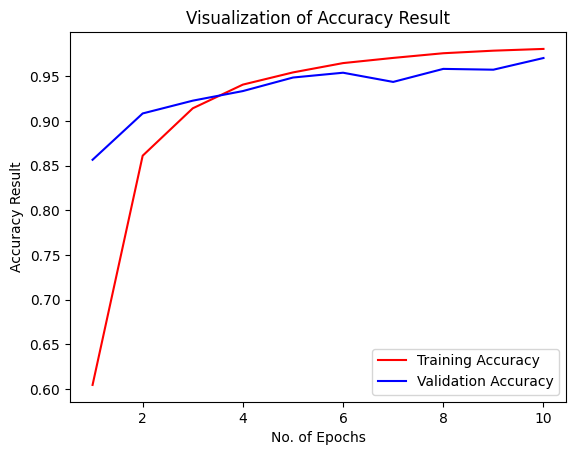

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [32]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\Harsidak Singh\Desktop\Plant_Disease_Predicition\New Plant Diseases Dataset\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17666 files belonging to 38 classes.


In [34]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

553/553 ━━━━━━━━━━━━━━━━━━━━ 55s 100ms/step


(array([[9.9999118e-01, 2.8784431e-08, 6.8586907e-08, ..., 1.0998096e-12,
         4.0955889e-12, 6.2398792e-10],
        [9.9999988e-01, 1.0164668e-07, 4.9119464e-09, ..., 8.0128470e-17,
         1.0990914e-12, 6.1769643e-12],
        [1.0000000e+00, 3.7426430e-11, 4.8952518e-09, ..., 1.5792501e-17,
         5.5560168e-16, 3.2668855e-13],
        ...,
        [8.8189254e-13, 7.1748722e-15, 1.3660328e-11, ..., 1.1839385e-14,
         2.7150097e-13, 1.0000000e+00],
        [6.5856852e-13, 2.1452255e-15, 3.1005159e-12, ..., 9.9539964e-14,
         4.8482794e-13, 1.0000000e+00],
        [6.7146355e-14, 3.5209818e-14, 8.6113442e-14, ..., 1.4141571e-13,
         2.6047837e-11, 9.9999976e-01]], dtype=float32),
 (17666, 38))

In [35]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [36]:
predicted_categories

<tf.Tensor: shape=(17666,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [37]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17666, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [39]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17666,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [42]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.95      0.97       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.96      0.98      0.97       502
                               Blueberry___healthy       0.95      1.00      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.98      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.97      0.94       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.93      0.

In [43]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[479,   2,   1, ...,   0,   0,   0],
       [  0, 494,   0, ...,   0,   0,   0],
       [  0,   0, 428, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 480,   0,   0],
       [  0,   0,   0, ...,   0, 428,   0],
       [  0,   0,   0, ...,   0,   0, 478]])

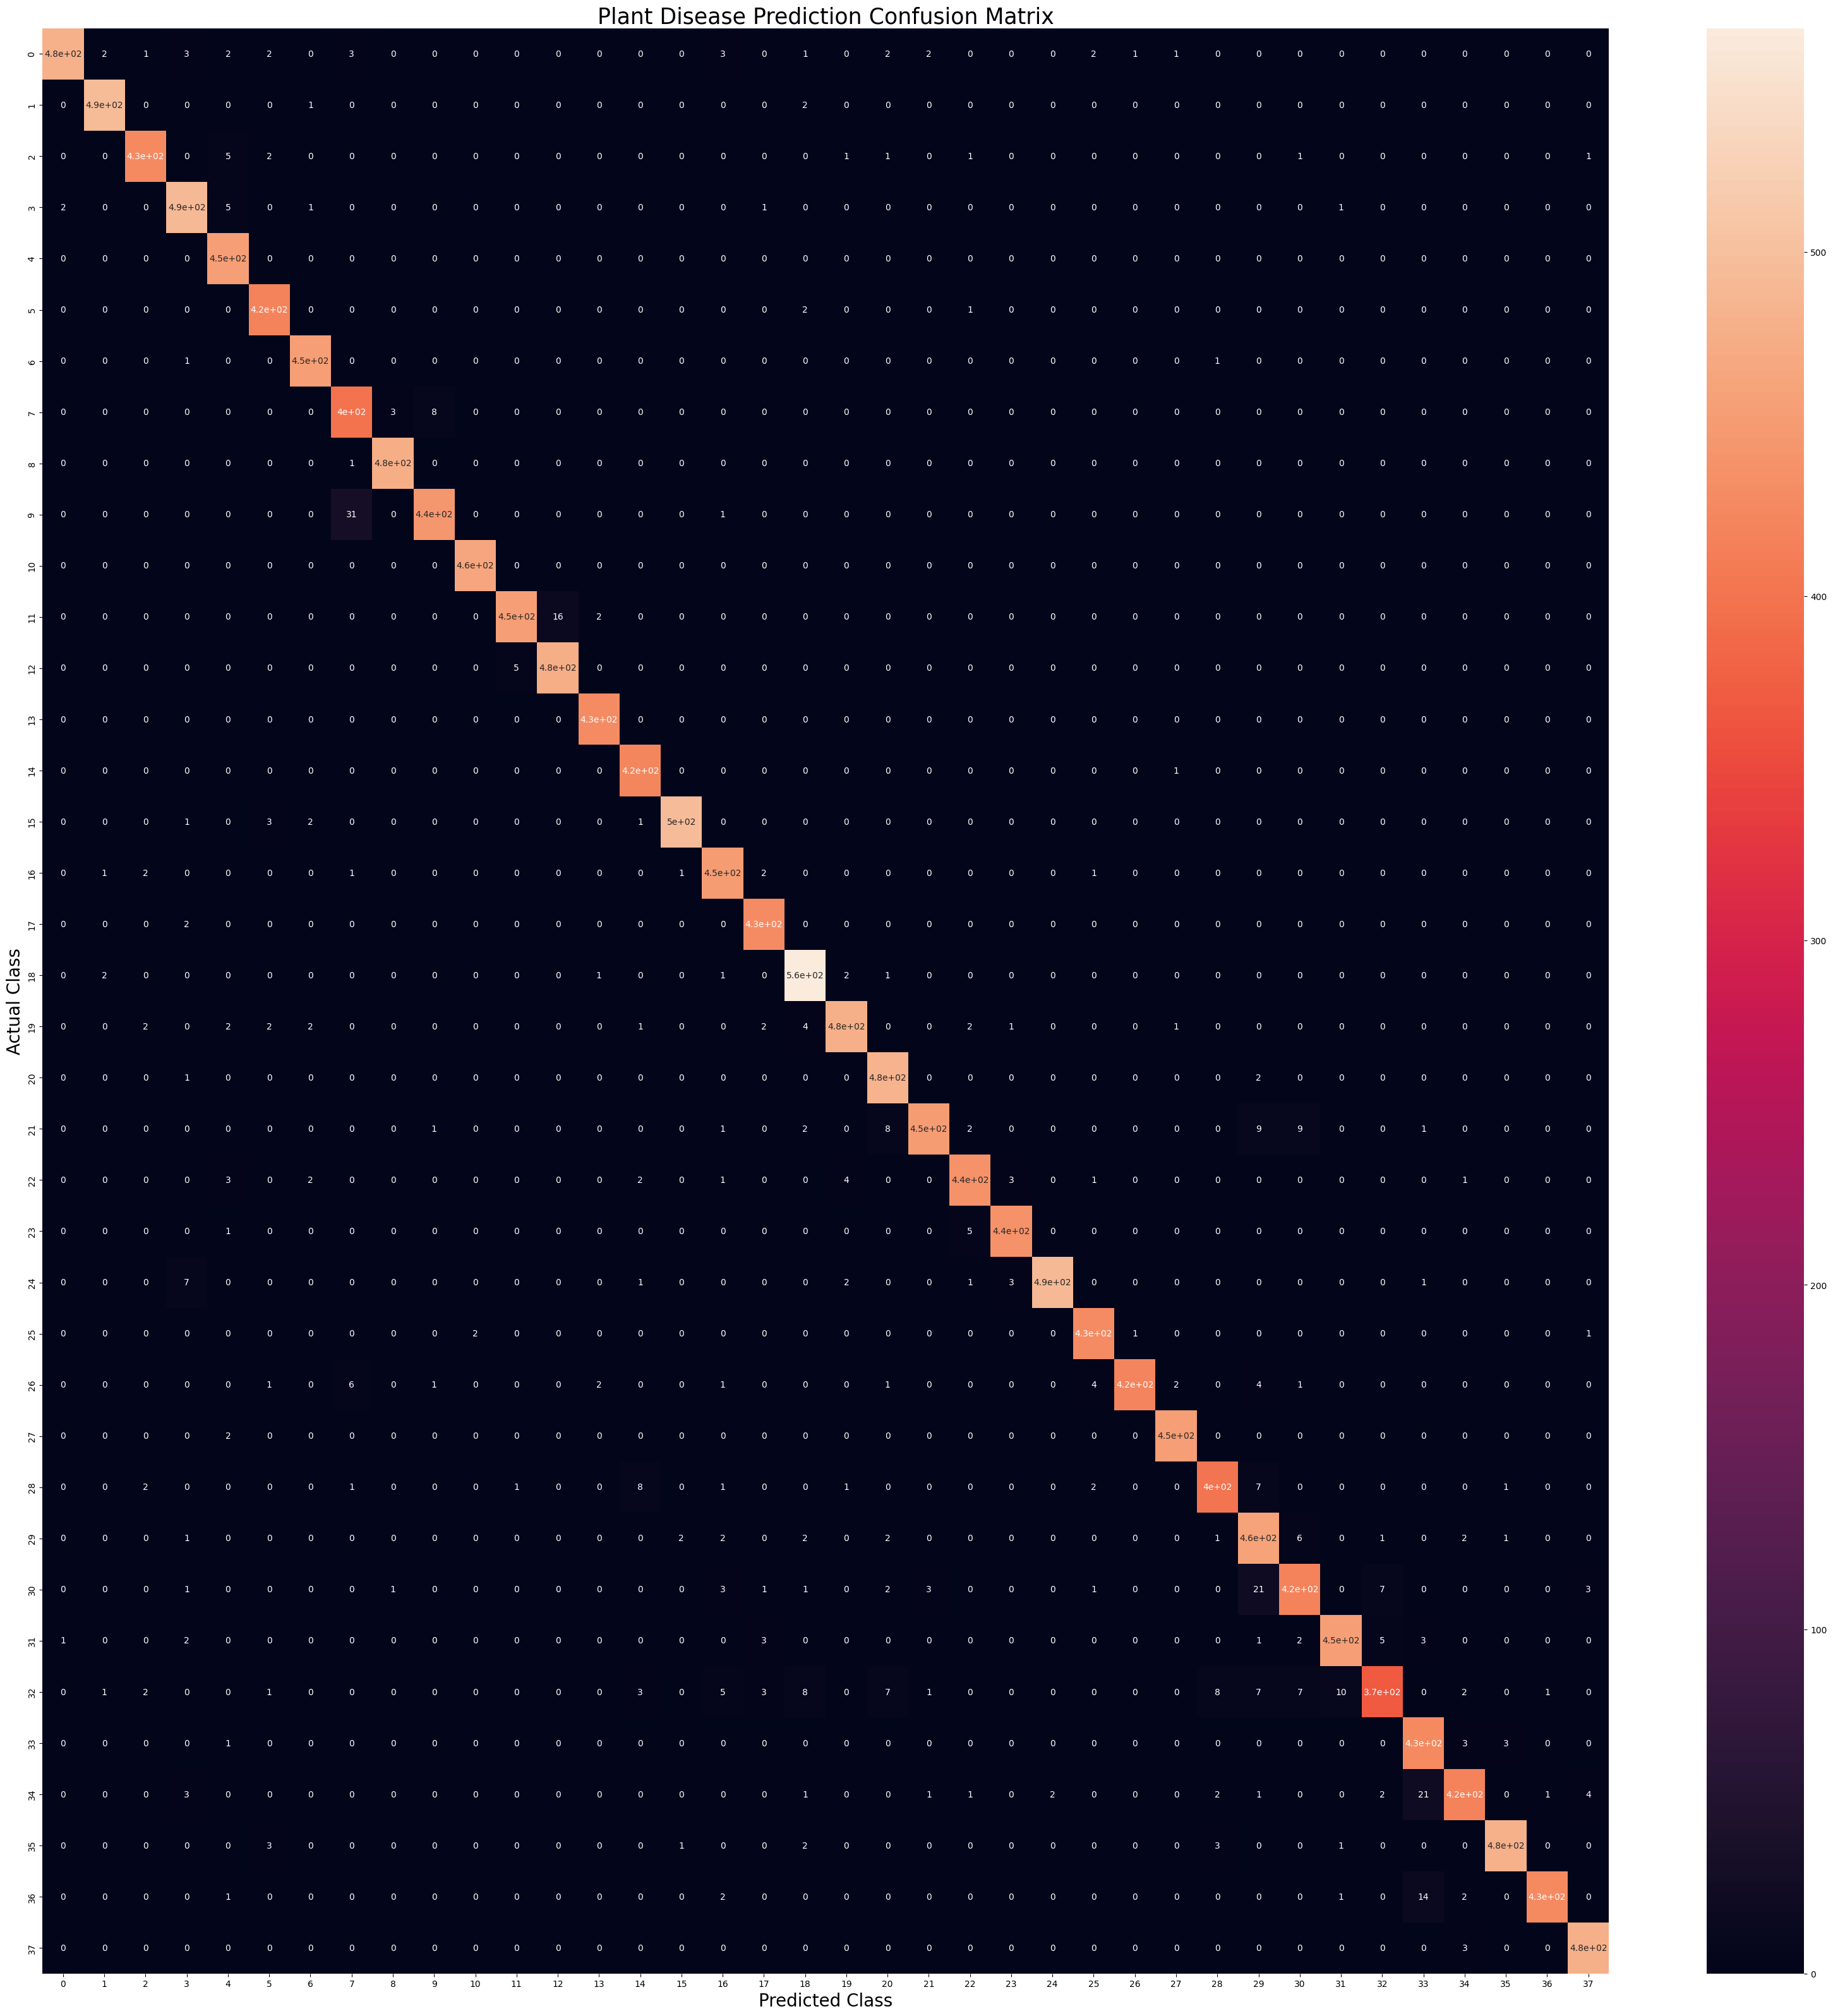

In [44]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()